# Домашняя работа №2

In [1]:
import numpy as np
from scipy.optimize import approx_fprime
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 20]
from matplotlib import pyplot as plt
from scipy.signal import find_peaks

### Задание 1

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


### Задание 2: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

In [7]:
def function(x):
    return 2*x[0]**2*x[1]**3 + 1/x[0] + x[1]**2*x[0] + 7

x = np.array([1, 2])

eps = np.sqrt(np.finfo(float).eps)
grad = approx_fprime(x, function, [eps, eps])
print(f'Значение частной производной в точке (1, 2) равно {grad}')

Значение частной производной в точке (1, 2) равно [35.00000024 28.00000024]


### Задание 3

Найти точки минимума в следующих данных (колонка height):

In [202]:
import pandas as pd
data = pd.read_csv('video.csv')


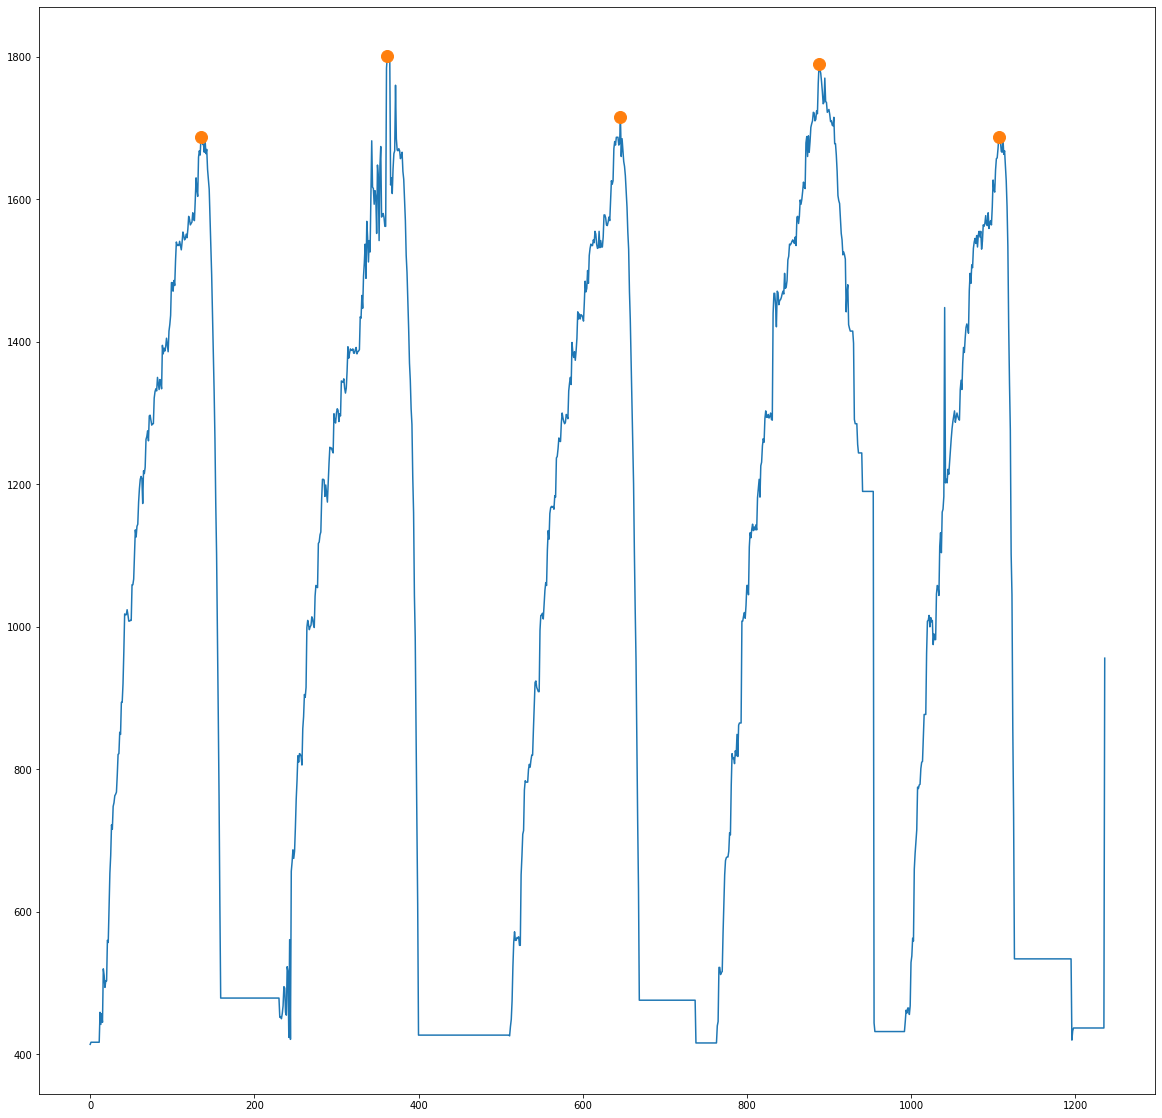

In [248]:
peaks, _ = find_peaks(data.height, prominence=1, width=20)
plt.plot(data.height)
plt.plot(peaks, data.height[peaks], "o", markersize=12)

In [225]:
# Находим производную
seconds_arr = []
height_arr = []
seconds_arr = data.sec.unique()
derivative_arr = []
for i in range(len(seconds_arr)-1):
    fx0 = list(data.loc[data.sec == seconds_arr[i], 'height'])[0]
    fx = list(data.loc[data.sec == seconds_arr[i+1], 'height'])[0]
    x0 = seconds_arr[i]
    x = seconds_arr[i+1]
    derivative = (fx - fx0)/(x-x0)
    derivative_arr.append(derivative)

derivative_arr.append((list(data.loc[data.sec == seconds_arr[-1], 'height'])[0] - 
                     list(data.loc[data.sec == seconds_arr[-2], 'height'])[0])/(seconds_arr[-1] - seconds_arr[-2]))


1) Координаты первого минимума: x= [157], y= 479
2) Координаты второго минимума: x= [384], y= 427
3) Координаты третьего минимума: x= [668], y= 476
4) Координаты четвертого минимума: x= [910], y= 432
5) Координаты пятого минимума: x= [1129], y= 534


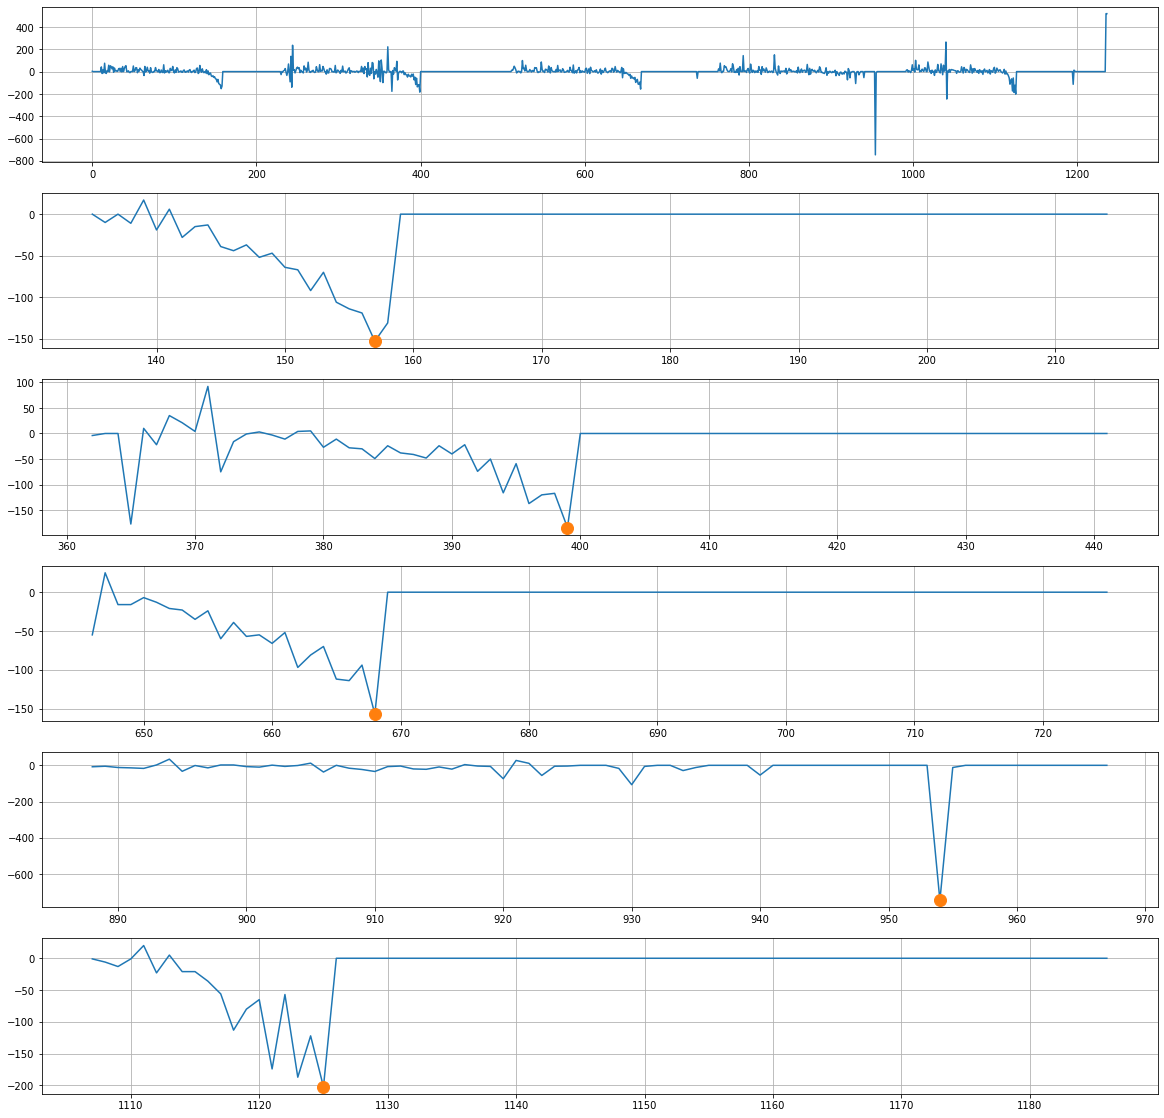

In [249]:
# Разбиваем график на пять характерных участков, на участках определяем prominance
# Длины участков - от пиков из первого графика до точки peak + 80
# Для нахождения локальных prominence график переворачивается (peaks_neg)

_, sub = plt.subplots(len(peaks)+1)
sub[0].plot(seconds_arr, derivative_arr)
sub[0].grid()

der_arr_neg1 = [x*(-1) for x in derivative_arr[peaks[0]:(peaks[0]+80)]]
peaks_neg1, _1 = find_peaks(der_arr_neg1, prominence=1 , width=5)
der_arr1 = derivative_arr[peaks[0]:(peaks[0]+80)]
sub[1].plot(seconds_arr[peaks[0]:(peaks[0]+80)], der_arr1)
sub[1].plot(peaks_neg1+peaks[0], min(der_arr1), 'o', markersize=12)
sub[1].grid()
# Точка минимального значения производной найдена, тем не менее координата
# высоты "y" отстоит справа от этоой точки, поэтому прибавляем еще +5 к координате "х"
y1 = list(data.loc[data.sec == (peaks_neg1+peaks[0])[0]+5, 'height'])[0]

der_arr_neg2 = [x*(-1) for x in derivative_arr[peaks[1]:(peaks[1]+80)]]
peaks_neg2, _2 = find_peaks(der_arr_neg2, prominence=1, width=3)
der_arr2 = derivative_arr[peaks[1]:(peaks[1]+80)]
sub[2].plot(seconds_arr[peaks[1]:(peaks[1]+80)], der_arr2)
sub[2].plot(peaks_neg2+peaks[1], min(der_arr2), 'o', markersize=12)
sub[2].grid()
y2 = list(data.loc[data.sec == (peaks_neg2+peaks[1])[0]+5, 'height'])[0]

der_arr_neg3 = [x*(-1) for x in derivative_arr[peaks[2]:(peaks[2]+80)]]
peaks_neg3, _3 = find_peaks(der_arr_neg3, prominence=1, width=3)
der_arr3 = derivative_arr[peaks[2]:(peaks[2]+80)]
sub[3].plot(seconds_arr[peaks[2]:(peaks[2]+80)], der_arr3)
sub[3].plot(peaks_neg3+peaks[2], min(der_arr3), 'o', markersize=12)
sub[3].grid()
y3 = list(data.loc[data.sec == (peaks_neg3+peaks[2])[0]+5, 'height'])[0]


der_arr_neg4 = [x*(-1) for x in derivative_arr[peaks[3]:(peaks[3]+80)]]
peaks_neg4, _4 = find_peaks(der_arr_neg4, prominence=1, width=1)
der_arr4 = derivative_arr[peaks[3]:(peaks[3]+80)]
sub[4].plot(seconds_arr[peaks[3]:(peaks[3]+80)], der_arr4)
sub[4].plot(peaks_neg4[-1]+peaks[3], min(der_arr4), 'o', markersize=12)
sub[4].grid()
# Четвертая координата не дает верную координату "y", пришлось дать дополнительное приращения +70 
y4 = list(data.loc[data.sec == (peaks_neg4+peaks[3])[0]+70, 'height'])[0]


der_arr_neg5 = [x*(-1) for x in derivative_arr[peaks[4]:(peaks[4]+80)]]
peaks_neg5, _5 = find_peaks(der_arr_neg5, prominence=1, width=3)
der_arr5 = derivative_arr[peaks[4]:(peaks[4]+80)]
sub[5].plot(seconds_arr[peaks[4]:(peaks[4]+80)], der_arr5)
sub[5].plot(peaks_neg5+peaks[4], min(der_arr5), 'o', markersize=12)
sub[5].grid()
y5 = list(data.loc[data.sec == (peaks_neg5+peaks[4])[0]+5, 'height'])[0]


print(f'1) Координаты первого минимума: x= {peaks_neg1+peaks[0]}, y= {y1}')
print(f'2) Координаты второго минимума: x= {peaks_neg1+peaks[1]}, y= {y2}')
print(f'3) Координаты третьего минимума: x= {peaks_neg1+peaks[2]}, y= {y3}')
print(f'4) Координаты четвертого минимума: x= {peaks_neg1+peaks[3]}, y= {y4}')
print(f'5) Координаты пятого минимума: x= {peaks_neg1+peaks[4]}, y= {y5}')
